# Gated Recurrent Unit (GRU)

- New York 대학의 조경현 교수가 제안한 Architecture
    
    - 조경현 교수님은 Long-Term Dependency에 관한 논문을 쓴 요슈아 벤지오 교수의 제자이다.
    
- GRU Layer는 LSTM Layer와 비슷한 역할을 하지만, 구조가 더 간단하기 때문에 계산상의 이점이 있고, 특정 문제에 있어서는 LSTM보다 좋은 성능을 보이기도 한다.

![GRU](https://lh3.googleusercontent.com/proxy/6wxizaH12JPCNxzH4gxFPf4QmTgZDzvMXsDfM-ryFMEcOGN4RR81v0OCEyqUBctht4zrzbCNxx_ZqMEk1YBLA8_Zi454DGG9Dc33l3zG2dEXBcggT5K0K5CmXNmZta-X7NaPpdB3URFc)

![GRU-2](https://t1.daumcdn.net/cfile/tistory/9982923F5ACB86A10E)

- GRU Layer는 Cell State가 없는 대신 h가 비슷한 역할을 한다.

- GRU Layer는 LSTM보다 Sigmoid 하나가 적게 쓰였다. (Gate가 줄었다)

- r은 Reset Gate, z는 Update Gate

    - Reset Gate는 이전 Timestep의 정보를 얼마나 남길 것인가를 결정하는 정도.
    
    - Update Gate는 LSTM의 Input과 Forget Gate의 출력 역할을 동시에 수행한다.

In [1]:
import numpy as np
X = []
Y = []

for i in range(3000):
    lst = np.random.rand(100)
    
    # 마킹할 숫자 2개의 index를 뽑는다.
    idx = np.random.choice(100, 2, replace=False)
    
    # 마킹 인덱스가 저장된 One-Hot Encoding Vector를 만든다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.93477325]
 [0.         0.55610496]
 [0.         0.583289  ]
 [0.         0.66057605]
 [0.         0.34045809]
 [0.         0.60820404]
 [0.         0.15996404]
 [0.         0.77377287]
 [0.         0.1997945 ]
 [0.         0.11784829]
 [0.         0.79082167]
 [0.         0.14668757]
 [0.         0.85509635]
 [0.         0.45769656]
 [0.         0.26465056]
 [0.         0.3541809 ]
 [0.         0.31657186]
 [0.         0.36265041]
 [0.         0.47237187]
 [0.         0.98863996]
 [0.         0.27317431]
 [0.         0.69828869]
 [0.         0.4103874 ]
 [0.         0.04496166]
 [0.         0.71001025]
 [0.         0.64253727]
 [0.         0.09197076]
 [0.         0.11406786]
 [0.         0.1333381 ]
 [0.         0.02983594]
 [0.         0.46997182]
 [0.         0.51480122]
 [0.         0.49529533]
 [0.         0.71676647]
 [0.         0.22929995]
 [0.         0.99658537]
 [0.         0.33074319]
 [0.         0.91950335]
 [0.         0.02124019]
 [0.         0.81361487]


In [2]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [3]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0531 - val_loss: 0.0509
Epoch 2/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0494 - val_loss: 0.0507
Epoch 3/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0493 - val_loss: 0.0505
Epoch 4/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0496 - val_loss: 0.0505
Epoch 5/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0492 - val_loss: 0.0505
Epoch 6/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0499 - val_loss: 0.0507
Epoch 7/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0490 - val_loss: 0.0513
Epoch 8/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0492 - val_loss: 0.0506
Epoch 9/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0489 - val_loss: 0.0515
Epoch 10

2048/2048 [==============================] - 3s 1ms/sample - loss: 2.1064e-04 - val_loss: 2.9972e-04
Epoch 75/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 2.4198e-04 - val_loss: 1.8695e-04
Epoch 76/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 2.0520e-04 - val_loss: 2.0336e-04
Epoch 77/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 2.5209e-04 - val_loss: 1.6687e-04
Epoch 78/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 2.0142e-04 - val_loss: 1.9833e-04
Epoch 79/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 2.0308e-04 - val_loss: 1.6515e-04
Epoch 80/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 1.9141e-04 - val_loss: 1.8014e-04
Epoch 81/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 1.8125e-04 - val_loss: 1.6262e-04
Epoch 82/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 2.4598e-04 - val_loss

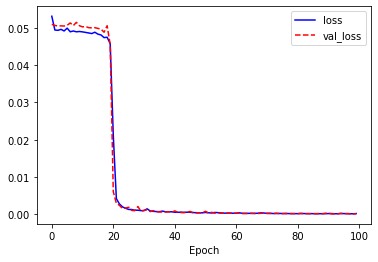

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [5]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness: ', (440 - fail) / 440 * 100, '%')

440/440 [==============================] - 0s 968us/sample - loss: 1.7399e-04
0.8310763929995858 	 0.8182686 	diff: 0.01280779587357872
0.0806986949628574 	 0.07844356 	diff: 0.002255137938855331
0.08304094021252456 	 0.0861237 	diff: 0.0030827572471731624
0.1381605063635779 	 0.13968553 	diff: 0.0015250201266335806
0.3896067466936303 	 0.36866862 	diff: 0.020938130875606642
correctness:  98.63636363636363 %
